<a href="https://colab.research.google.com/github/Anantha-Rao12/DeleMa-detect/blob/master/ml_images_delema_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For Data Analysis
import numpy as np
import pandas as pd

# For Plotting
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

# Sklearn Utils for Machine Learning Models 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN 

# Metrics to access Performance
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [18]:
path = '/content/drive/My Drive/DS-Python-notebooks/My-Projects/Malaria/data.csv'

df = pd.read_csv(path)

In [19]:
df.head()

,Label,area_0,area_1,area_2,area_3,area_4
0,Parasitized,175.5,126.0,131.0,8902.5,0.0
1,Parasitized,222.0,9847.5,0.0,0.0,0.0
2,Parasitized,179.5,256.5,12413.0,0.0,0.0
3,Parasitized,18.0,187.5,9306.5,0.0,0.0
4,Parasitized,142.5,156.5,6669.5,0.0,0.0


In [4]:
inf , uninf = df[df.Label == 'Parasitized'], df[df.Label == 'Uninfected']

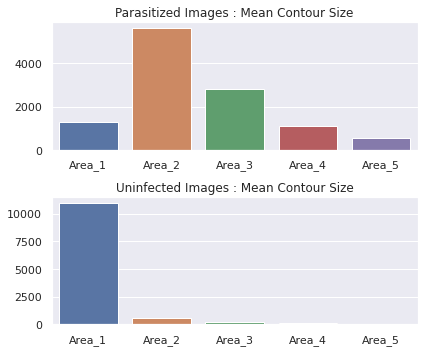

In [60]:
mean_inf = np.mean(inf.drop('Label',axis=1),axis=0)
mean_clean = np.mean(uninf.drop('Label',axis=1),axis=0)


xs = np.array(['Area_'+str(i) for i in range(1,6)]) 

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,5))

sns.barplot(x = xs, y=mean_inf.values,ax = ax[0])
ax[0].set_title('Parasitized Images : Mean Contour Size')
ax[1].set_title('Uninfected Images : Mean Contour Size')
sns.barplot(x = xs,y=mean_clean.values,ax =ax[1])

plt.tight_layout()
plt.show()

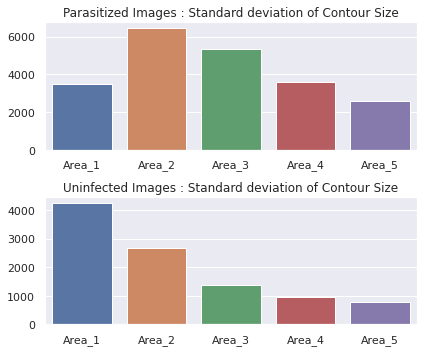

In [61]:
std_inf = np.std(inf.drop('Label',axis=1),axis=0)
std_clean = np.std(uninf.drop('Label',axis=1),axis=0)

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,5))

sns.barplot(x = xs, y= std_inf.values,ax = ax[0])
ax[0].set_title('Parasitized Images : Standard deviation of Contour Size')
sns.barplot(x = xs,y= std_clean.values,ax =ax[1])
ax[1].set_title('Uninfected Images : Standard deviation of Contour Size')
plt.tight_layout()


plt.show()

# Machine LEarning models


In [32]:
df['Label'].replace({'Parasitized':1,'Uninfected':0},inplace=True)
x_data = df.drop('Label',axis=1)
y_data = df['Label']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

## Log reg

In [35]:
logreg = LogisticRegression(random_state=0,max_iter=5000)
logreg.fit(X_train, y_train)
logreg_probs = logreg.predict_proba(X_test)

## KNN

In [36]:
knn = KNN(n_neighbors = 2) 
knn.fit(X_train, y_train)
knn_probs = knn.predict_proba(X_test)

## RF

In [37]:
rf = RandomForestClassifier(n_estimators =500,criterion='entropy', random_state=50)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

# NB

In [38]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_probs = nb.predict_proba(X_test)

## Computing ROC and AUC values

In [39]:
# Storing the probabilities for positive outcome 

prob_vals = [logreg_probs,rf_probs, knn_probs,nb_probs]
r_probs = [0 for _ in range(len(y_test))]  # worst case probability

positive_prob_vals = [i[:,1] for i in prob_vals]

p_logreg_probs,p_rf_probs, p_knn_probs,p_nb_probs = positive_prob_vals

In [40]:
## Computing ROC and AUC values

r_auc = roc_auc_score(y_test,r_probs)
log_reg_auc = roc_auc_score(y_test,p_logreg_probs)
rf_auc = roc_auc_score(y_test,p_rf_probs)
knn_auc = roc_auc_score(y_test,p_knn_probs)
nb_auc = roc_auc_score(y_test,p_nb_probs)

In [41]:
## Print AUROC scores

print("Random (chance) Prediction : AUROC = %.3f" %(r_auc))
print('Logistic Regression : AUROC = %.3f' %(log_reg_auc))
print('Random Forest : AUROC = %.3f' %(rf_auc))
print('KNN : AUROC = %.3f' %(knn_auc))
print('Naive Bayes : AUROC = %.3f' %(nb_auc))

Random (chance) Prediction : AUROC = 0.500
Logistic Regression : AUROC = 0.922
Random Forest : AUROC = 0.926
KNN : AUROC = 0.894
Naive Bayes : AUROC = 0.922


In [42]:
## Calculate ROC curve

r_fpr, r_tpr , _ = roc_curve(y_test, r_probs)
logreg_fpr,logreg_tpr, _ = roc_curve(y_test, p_logreg_probs)
rf_fpr,rf_tpr, _ = roc_curve(y_test, p_rf_probs)
knn_fpr,knn_tpr, _ = roc_curve(y_test, p_knn_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, p_nb_probs) 

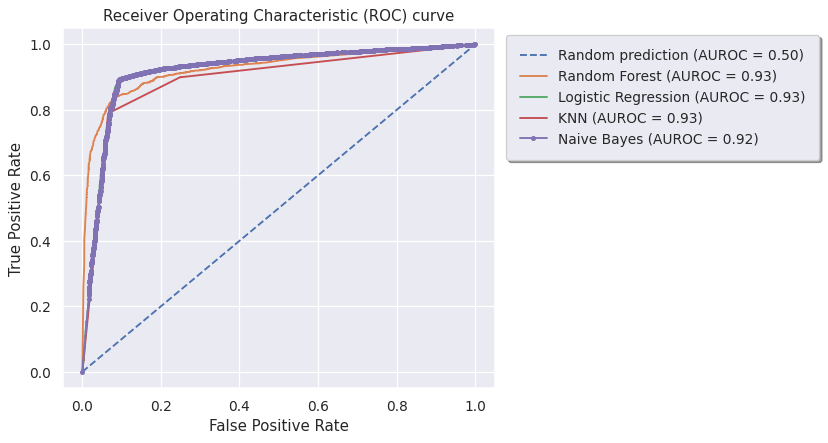

In [45]:

### Plot the ROC curves

fig = plt.figure(num=1,dpi=90,figsize=(6,5))
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(r_fpr,r_tpr, ls = '--', label='Random prediction (AUROC = %0.2f)' %(r_auc))

axes.plot(rf_fpr,rf_tpr, marker = ',', label='Random Forest (AUROC = %0.2f)' %(rf_auc))
axes.plot(logreg_fpr,logreg_tpr, marker = ',', label='Logistic Regression (AUROC = %0.2f)' %(rf_auc))
axes.plot(knn_fpr,knn_tpr, marker = ',', label='KNN (AUROC = %0.2f)' %(rf_auc))
axes.plot(nb_fpr,nb_tpr, marker = '.', label='Naive Bayes (AUROC = %0.2f)' %(nb_auc))

axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
axes.set_title('Receiver Operating Characteristic (ROC) curve') 

axes.legend(bbox_to_anchor=(1.01, 1),fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.show()


In [51]:
print(classification_report(y_test,logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2809
           1       0.90      0.88      0.89      2703

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512



In [52]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      2809
           1       0.85      0.87      0.86      2703

    accuracy                           0.86      5512
   macro avg       0.86      0.86      0.86      5512
weighted avg       0.86      0.86      0.86      5512



In [53]:
print(classification_report(y_test,nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2809
           1       0.92      0.80      0.86      2703

    accuracy                           0.87      5512
   macro avg       0.87      0.87      0.87      5512
weighted avg       0.87      0.87      0.87      5512



In [54]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2809
           1       0.92      0.79      0.85      2703

    accuracy                           0.86      5512
   macro avg       0.87      0.86      0.86      5512
weighted avg       0.87      0.86      0.86      5512

